In [1]:
# Install dependencies, then restart runtime before continuing
# Install will take 2-3 minutes

!git clone https://github.com/autogluon/tabrepo.git
!pip install -e tabrepo

!git clone https://github.com/autogluon/autogluon-bench.git
!pip install -e autogluon-bench

!git clone https://github.com/Innixma/autogluon-benchmark.git
!pip install -e autogluon-benchmark

!pip install autorank seaborn

Cloning into 'tabrepo'...
remote: Enumerating objects: 4049, done.
remote: Counting objects: 100% (983/983), done.
remote: Compressing objects: 100% (472/472), done.
remote: Total 4049 (delta 574), reused 709 (delta 509), pack-reused 3066
Receiving objects: 100% (4049/4049), 98.11 MiB | 26.46 MiB/s, done.
Resolving deltas: 100% (2881/2881), done.
Obtaining file:///content/tabrepo
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 58.9 MB/s eta 0:00:00
     ━━━

# NOTE: If using Colab: After installing packages, restart runtime before running the below cells!

To do so, go to Runtime -> Restart Session

If this isn't done, then you will get an import error and the notebook will not work.

The below code will download a small subset of TabRepo and demonstrate the core API functionality, showing how to access the model results, predictions, and how to fit ensembles of multiple models.

In [15]:
import pandas as pd

from tabrepo import load_repository, get_context, list_contexts, EvaluationRepository

context_names = list_contexts()
print(f"Available Contexts: {context_names}")

for context_name in context_names:
    context = get_context(context_name)
    print(f"\t{context_name}\t: {context.description}")

context_name = "D244_F3_C1530_10"
context = get_context(name=context_name)

config_hyperparameters = context.load_configs_hyperparameters()

repo: EvaluationRepository = load_repository(context_name, cache=True)

repo.print_info()

Available Contexts: ['D244_F3_C1416', 'D244_F3_C1416_10', 'D244_F3_C1416_100', 'D244_F3_C1416_175', 'D244_F3_C1416_200', 'D244_F3_C1416_3', 'D244_F3_C1416_30', 'D244_F3_C1530', 'D244_F3_C1530_10', 'D244_F3_C1530_100', 'D244_F3_C1530_200', 'D244_F3_C1530_3', 'D244_F3_C1530_30']
	D244_F3_C1416	: Large-scale Benchmark on 244 datasets and 3 folds (293 GB, 211 datasets)
	D244_F3_C1416_10	: Large-scale Benchmark on 244 datasets and 3 folds (200 MB, 10 smallest datasets)
	D244_F3_C1416_100	: Large-scale Benchmark on 244 datasets and 3 folds (8.7 GB, 100 smallest datasets)
	D244_F3_C1416_175	: Large-scale Benchmark on 244 datasets and 3 folds (50 GB, 175 smallest datasets)
	D244_F3_C1416_200	: Large-scale Benchmark on 244 datasets and 3 folds (107 GB, 200 smallest datasets)
	D244_F3_C1416_3	: Large-scale Benchmark on 244 datasets and 3 folds (30 MB, 3 smallest datasets)
	D244_F3_C1416_30	: Large-scale Benchmark on 244 datasets and 3 folds (1.0 GB, 30 smallest datasets)
	D244_F3_C1530	: Large-s

Now that we have the data loaded as an EvaluationRepository, we can query it in a variety of ways as demonstrated below.

In [16]:
datasets = repo.datasets()
print(f"Datasets: {datasets}")

dataset = "sensory"
dataset_info = repo.dataset_info(dataset=dataset)
print(f"Dataset Info    : {dataset_info}")

dataset_metadata = repo.dataset_metadata(dataset=dataset)
print(f"Dataset Metadata: {dataset_metadata}")

configs = repo.configs()
print(f"Configs (first 10): {configs[:10]}")

config = "CatBoost_r1_BAG_L1"
config_key = config.rsplit("_BAG_L1", 1)[0]
config_type = config_hyperparameters[config_key]["model_type"]
conf_hyperparameters = config_hyperparameters[config_key]["hyperparameters"]
print(f"Config: {config}\n"
      f"\tType           : {config_type}\n"
      f"\tHyperparameters: {conf_hyperparameters}")

metrics = repo.metrics(datasets=["sensory", "Moneyball"], configs=["CatBoost_r1_BAG_L1", "LightGBM_r41_BAG_L1"])
with pd.option_context("display.max_rows", None, "display.max_columns", None, "display.width", 1000):
    print(f"Config Metrics Example:\n{metrics}")

predictions_test = repo.predict_test(dataset=dataset, fold=0, config=config)
print(f"Predictions Test (config={config}, dataset={dataset}, fold=0):\n{predictions_test}")

y_test = repo.labels_test(dataset=dataset, fold=0)
print(f"Ground Truth Test (dataset={dataset}, fold=0):\n{y_test}")

predictions_val = repo.predict_val(dataset=dataset, fold=0, config=config)
print(f"Predictions Val (config={config}, dataset={dataset}, fold=0):\n{predictions_val[:10]}")

y_val = repo.labels_val(dataset=dataset, fold=0)
print(f"Ground Truth Val (dataset={dataset}, fold=0):\n{y_val[:10]}")

df_ranks, df_ensemble_weights = repo.evaluate_ensembles(datasets=[dataset], ensemble_size=100)
print(f"Ensemble rank per task:\n{df_ranks}")

df_ensemble_weights_mean_sorted = df_ensemble_weights.mean(axis=0).sort_values(ascending=False)
print(f"Top 10 highest mean ensemble weight configs:\n{df_ensemble_weights_mean_sorted.head(10)}")


Datasets: ['MIP-2016-regression', 'Moneyball', 'arcene', 'boston', 'dresses-sales', 'fri_c3_500_50', 'pm10', 'sensory', 'socmob', 'tecator']
Dataset Info    : {'metric': 'rmse', 'problem_type': 'regression'}
Dataset Metadata: {'dataset': 'sensory', 'tid': 359931, 'ttid': 'TaskType.SUPERVISED_REGRESSION', 'did': 546, 'name': 'sensory', 'task_type': 'Supervised Regression', 'status': 'active', 'estimation_procedure': '10-fold Crossvalidation', 'evaluation_measures': 'root_mean_squared_error', 'source_data': 546, 'target_feature': 'Score', 'MajorityClassSize': nan, 'MaxNominalAttDistinctValues': 6.0, 'MinorityClassSize': nan, 'NumberOfClasses': 0.0, 'NumberOfFeatures': 12.0, 'NumberOfInstances': 576.0, 'NumberOfInstancesWithMissingValues': 0.0, 'NumberOfMissingValues': 0.0, 'NumberOfNumericFeatures': 1.0, 'NumberOfSymbolicFeatures': 11.0, 'number_samples': nan, 'cost_matrix': nan, 'source_data_labeled': nan, 'target_feature_event': nan, 'target_feature_left': nan, 'target_feature_right': 

Next, we will run the paper's core experiments, regenerating all tables and figures in the paper. For the sake of a quick demo, we only run a small subset of TabRepo by default, and skip generating Figure 4 which accounts for 95% of the simulation runtime. Refer to the below comments if you want to exactly replicate the paper results.

In [3]:
# Small subset of TabRepo using the 10 smallest datasets. Running this will take ~10 minutes on Colab, or under a minute on a 32 CPU core machine.
!python tabrepo/scripts/baseline_comparison/evaluate_baselines.py --repo "D244_F3_C1530_10" --skip_expensive_simulations

# To run the full experiments and replicate all tables and figures in the paper, uncomment and run the following:
# !python tabrepo/scripts/baseline_comparison/evaluate_baselines.py --repo "D244_F3_C1530_200"
#  Note that this will take a long time. Don't try it on Colab.
#  You will need 200 GB of free disk space, a high bandwidth internet connection (will download 130 GB of files),
#  and it is suggested you have at minimum 32 GB of available memory (64 GB recommended).
#  It is expected to run for ~380 CPU hours, or a little under 3 hours on a m6i.32xlarge EC2 instance with 128 CPU cores

{'repo': 'D244_F3_C1530_10', 'n_folds': -1, 'n_datasets': None, 'ignore_cache': False, 'all_configs': False, 'skip_expensive_simulations': True, 'expname': None, 'engine': 'ray', 'ray_process_ratio': None}
Cache /root/cache-zeroshot/repo_D244_F3_C1530_10.pkl not found or ignore_cache set to True, regenerating the file
start: Evaluate function.
start: Loading ZS Context
Loading BenchmarkContext:
	name: D244_F3_C1530_10
	description: Large-scale Benchmark on 244 datasets and 3 folds (220 MB, 10 smallest datasets)
	date: 2023_11_14
	folds: [0, 1, 2]
All required files are present...
Loading input files...
	configs :           /content/tabrepo/data/results/2023_11_14/configs.parquet
	metadata:           /content/tabrepo/data/metadata/task_metadata_244.csv
Loading baselines: /content/tabrepo/data/results/2023_11_14/baselines.parquet
Loading config hyperparameter definitions... Note: Hyperparameter definitions are only accurate for the latest version.
Loading ZS inputs:
	pred_proba:  /conten

In [4]:
# Install packages to view the figures
!apt-get install poppler-utils
!pip install pdf2image

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 0s (2,034 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [5]:
context = "D244_F3_C1530_10"
figure_path_prefix = f"tabrepo/scripts/output/{context}/figures/"

In [6]:
from pdf2image import convert_from_path
from IPython.display import display, Image

import os
figure_names = os.listdir(figure_path_prefix)
figure_names.sort()
images_list = []
for figure_name in figure_names:
  print(f"Displaying Figure '{figure_name}'")
  images = convert_from_path(f"{figure_path_prefix}{figure_name}")
  images_list.append(images[0])

Displaying Figure 'critical-diagram.pdf'
Displaying Figure 'data-analysis.pdf'
Displaying Figure 'portfolio-model-presence.pdf'
Displaying Figure 'scatter-perf-vs-time-lower-budget.pdf'
Displaying Figure 'scatter-perf-vs-time.pdf'
Displaying Figure 'tuning-impact.pdf'


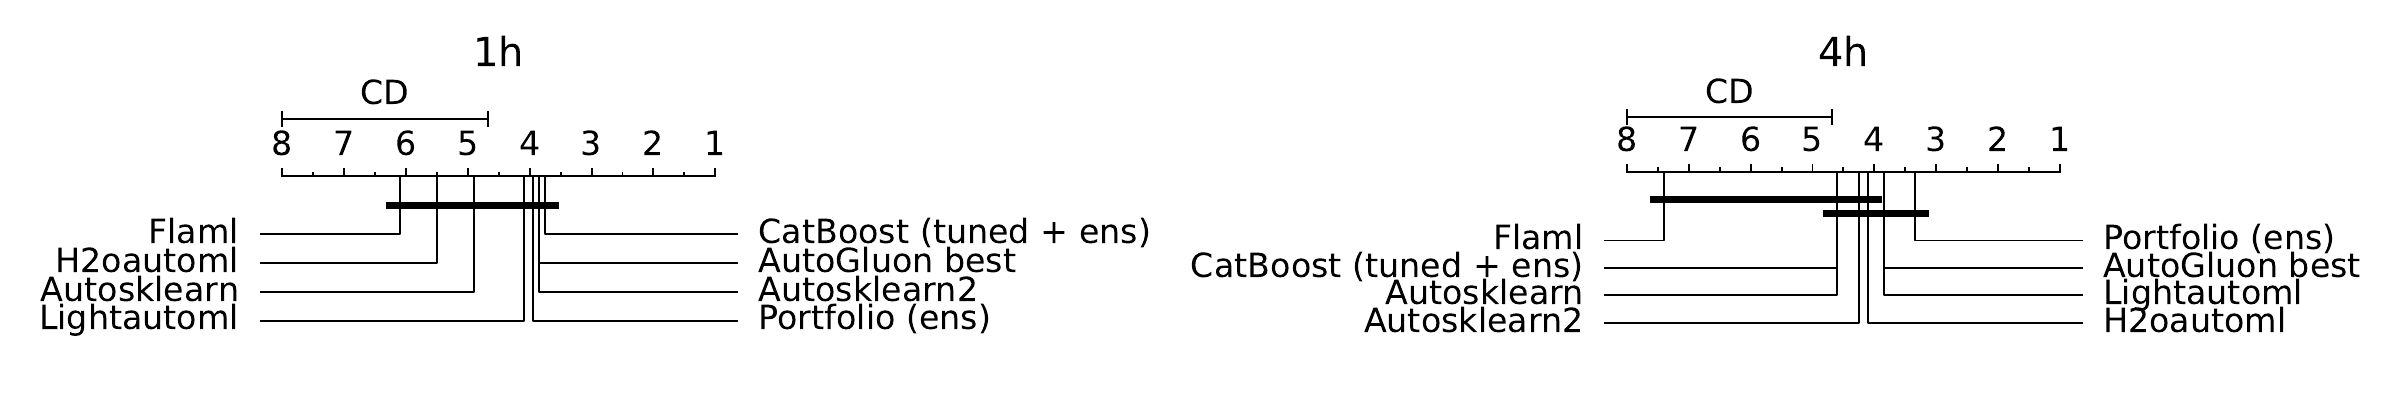

In [7]:
images_list[0]

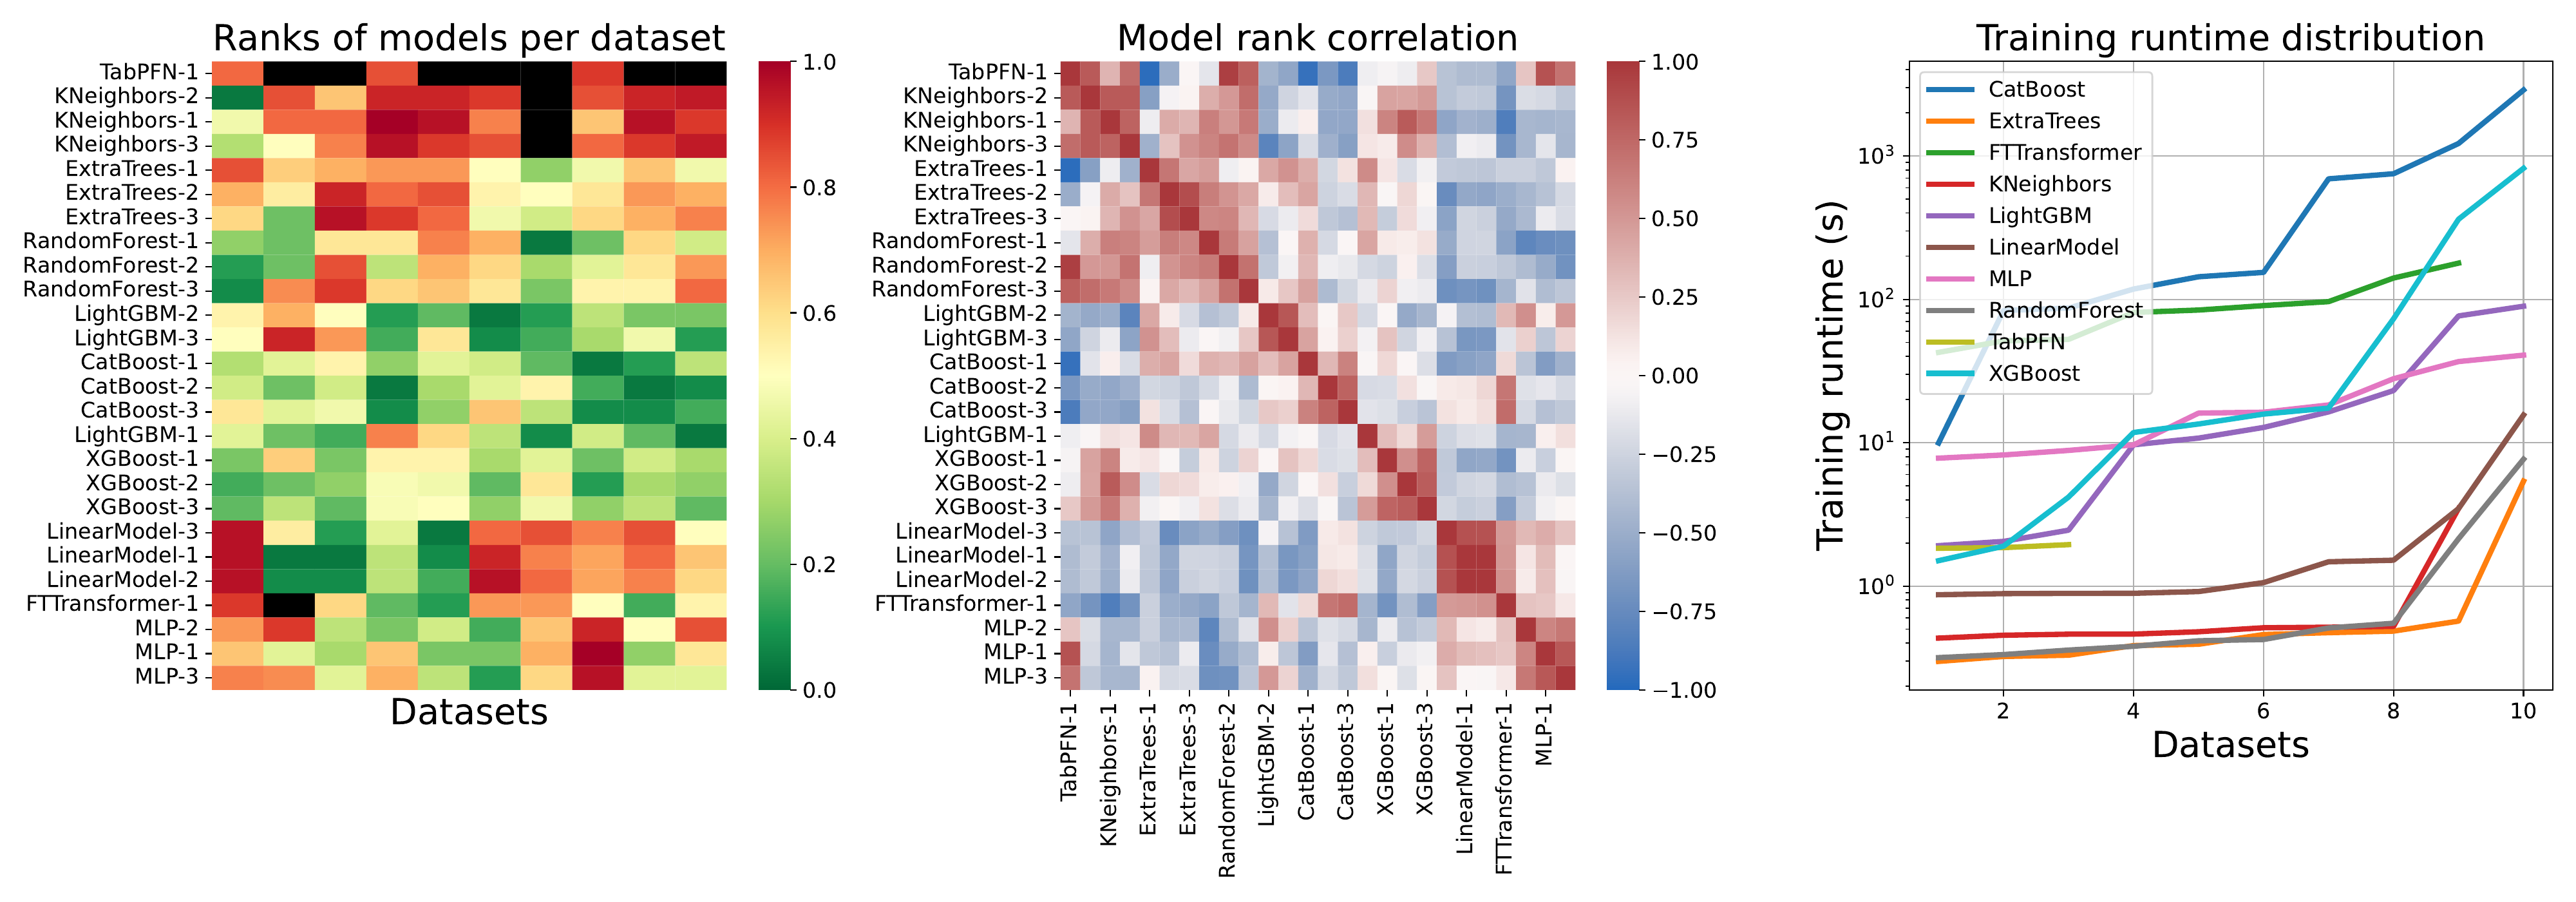

In [8]:
images_list[1]

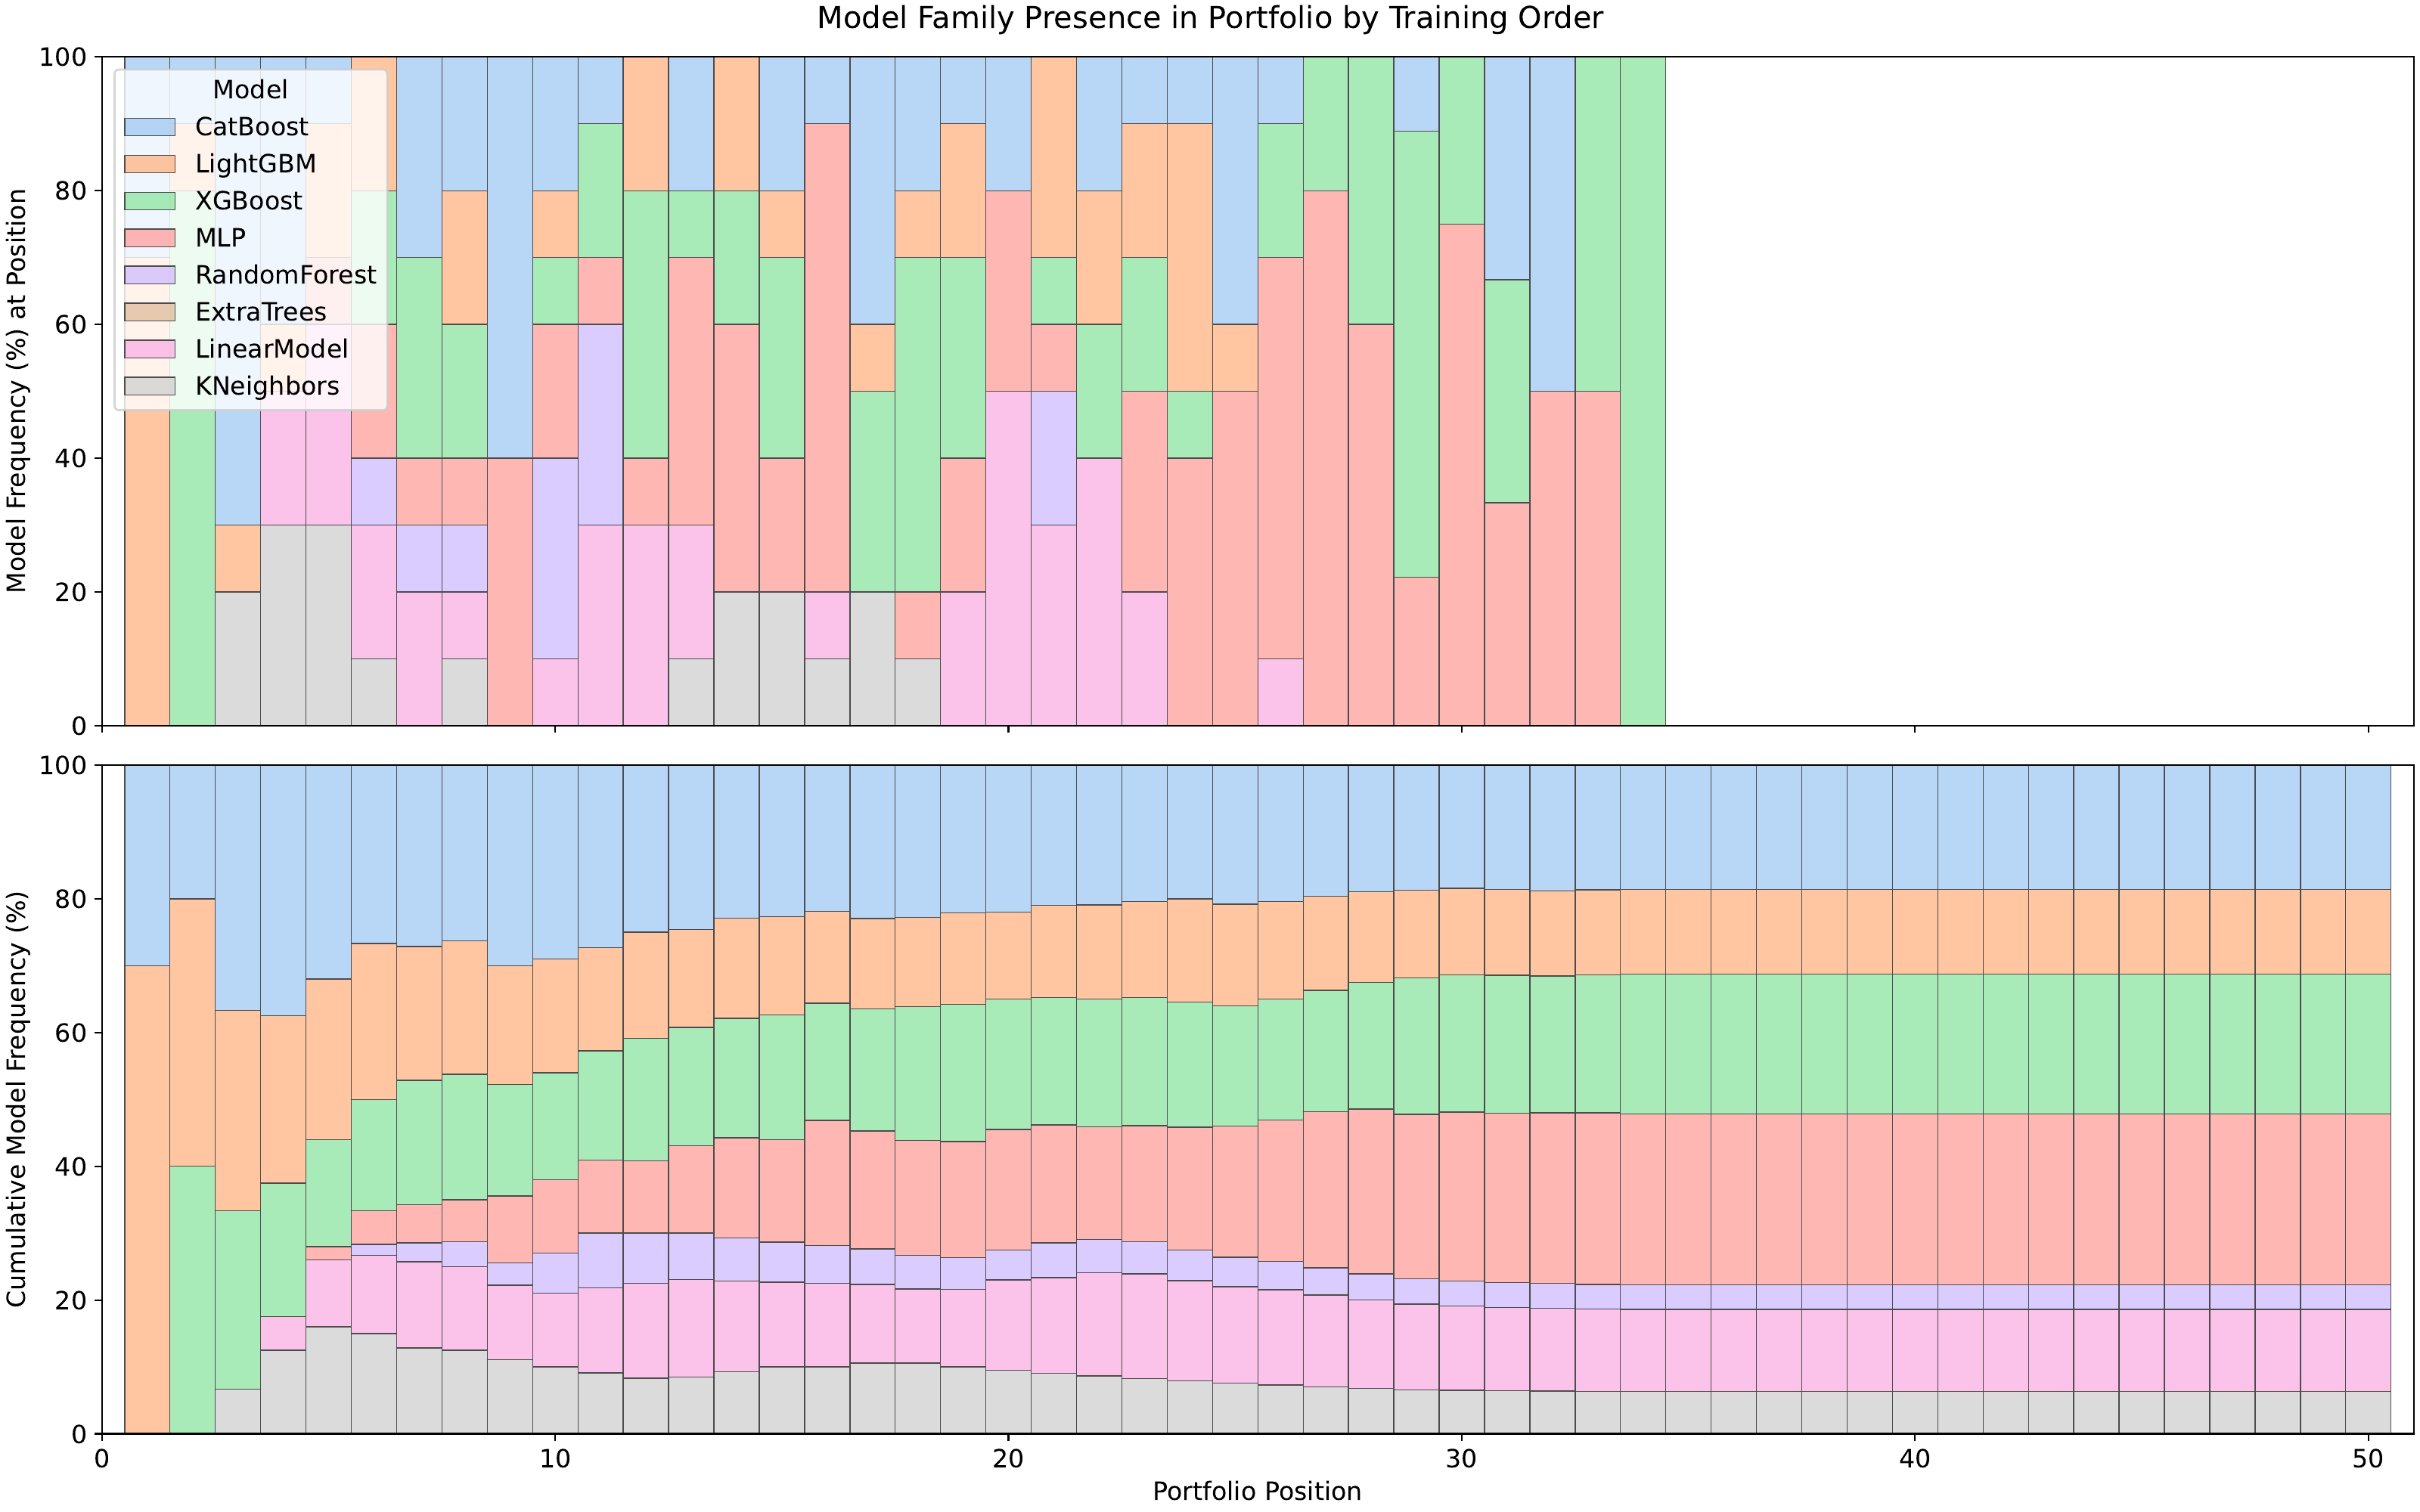

In [9]:
images_list[2]

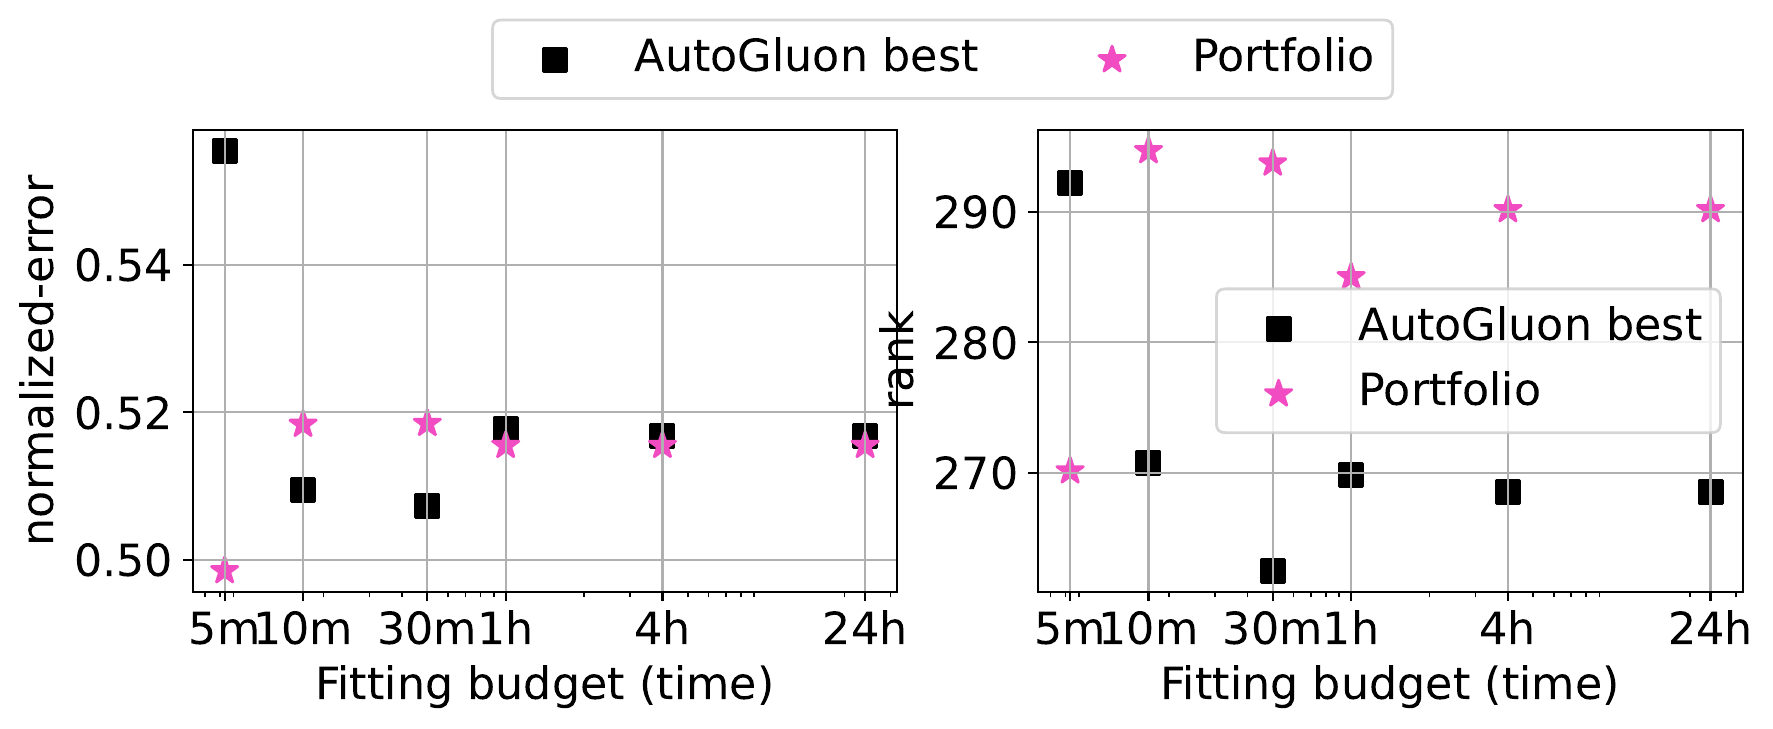

In [10]:
images_list[3]

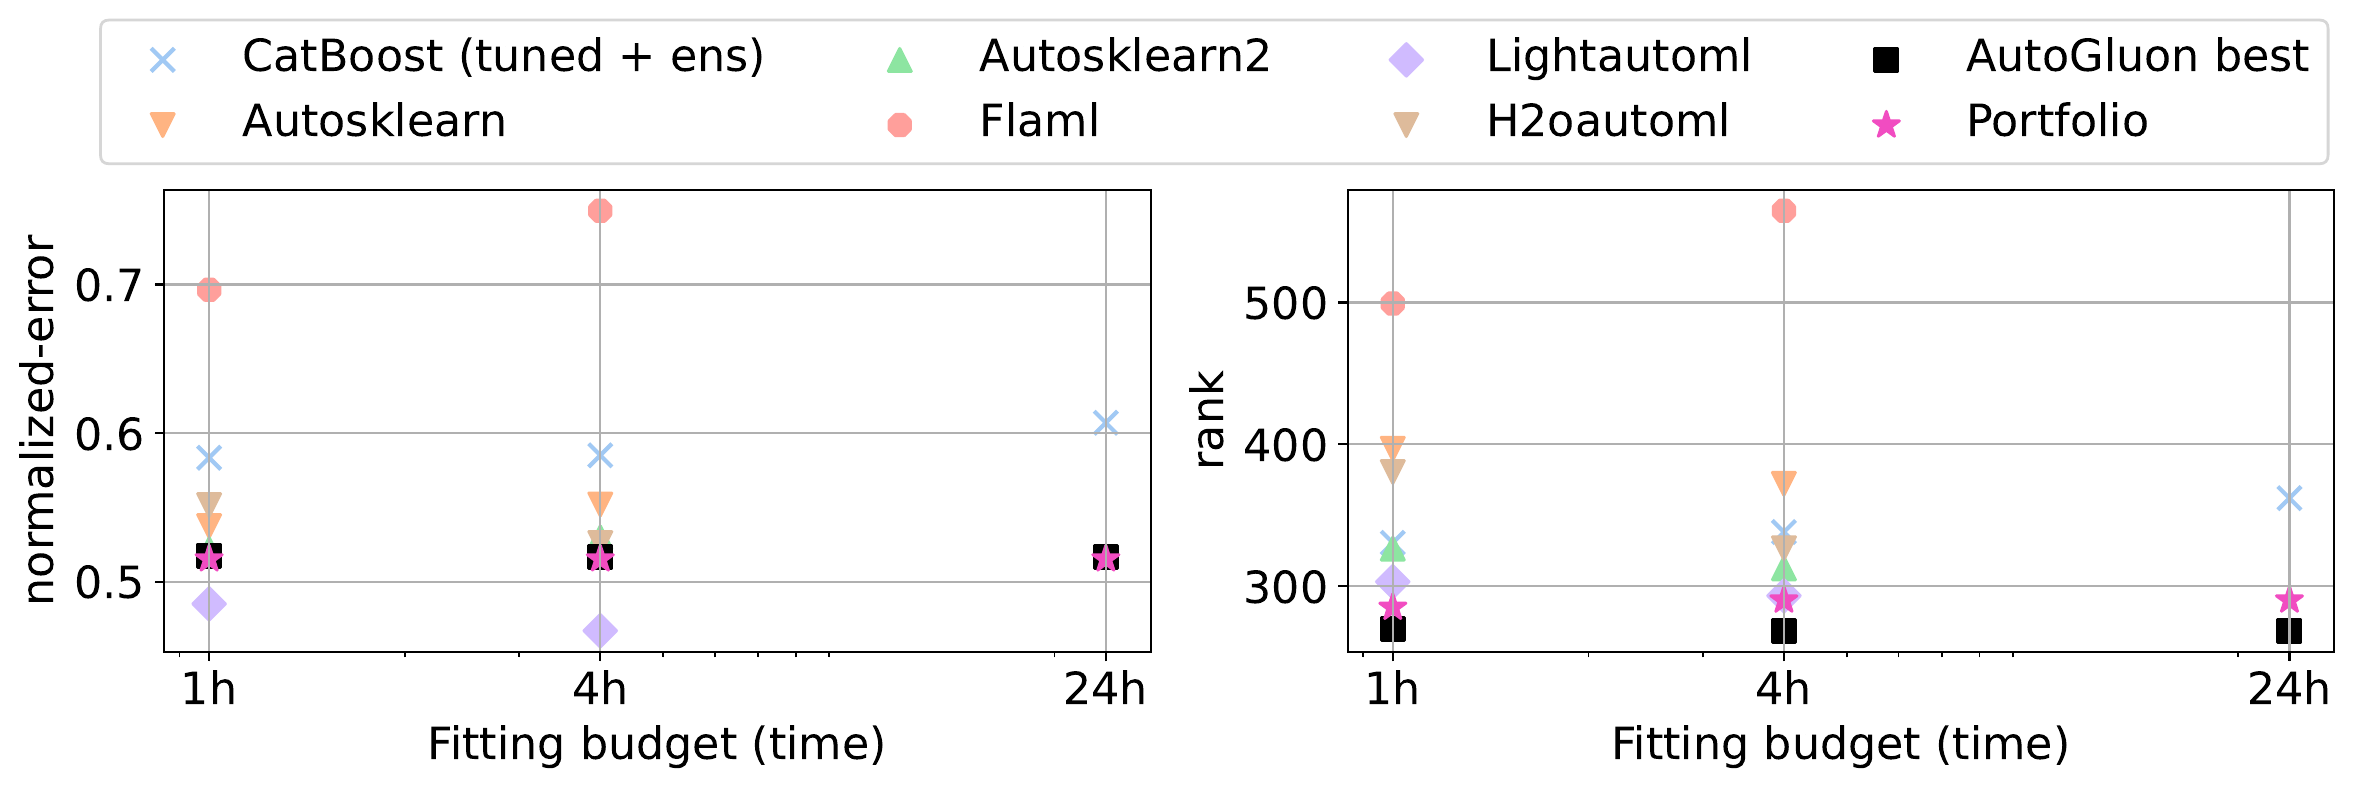

In [11]:
images_list[4]

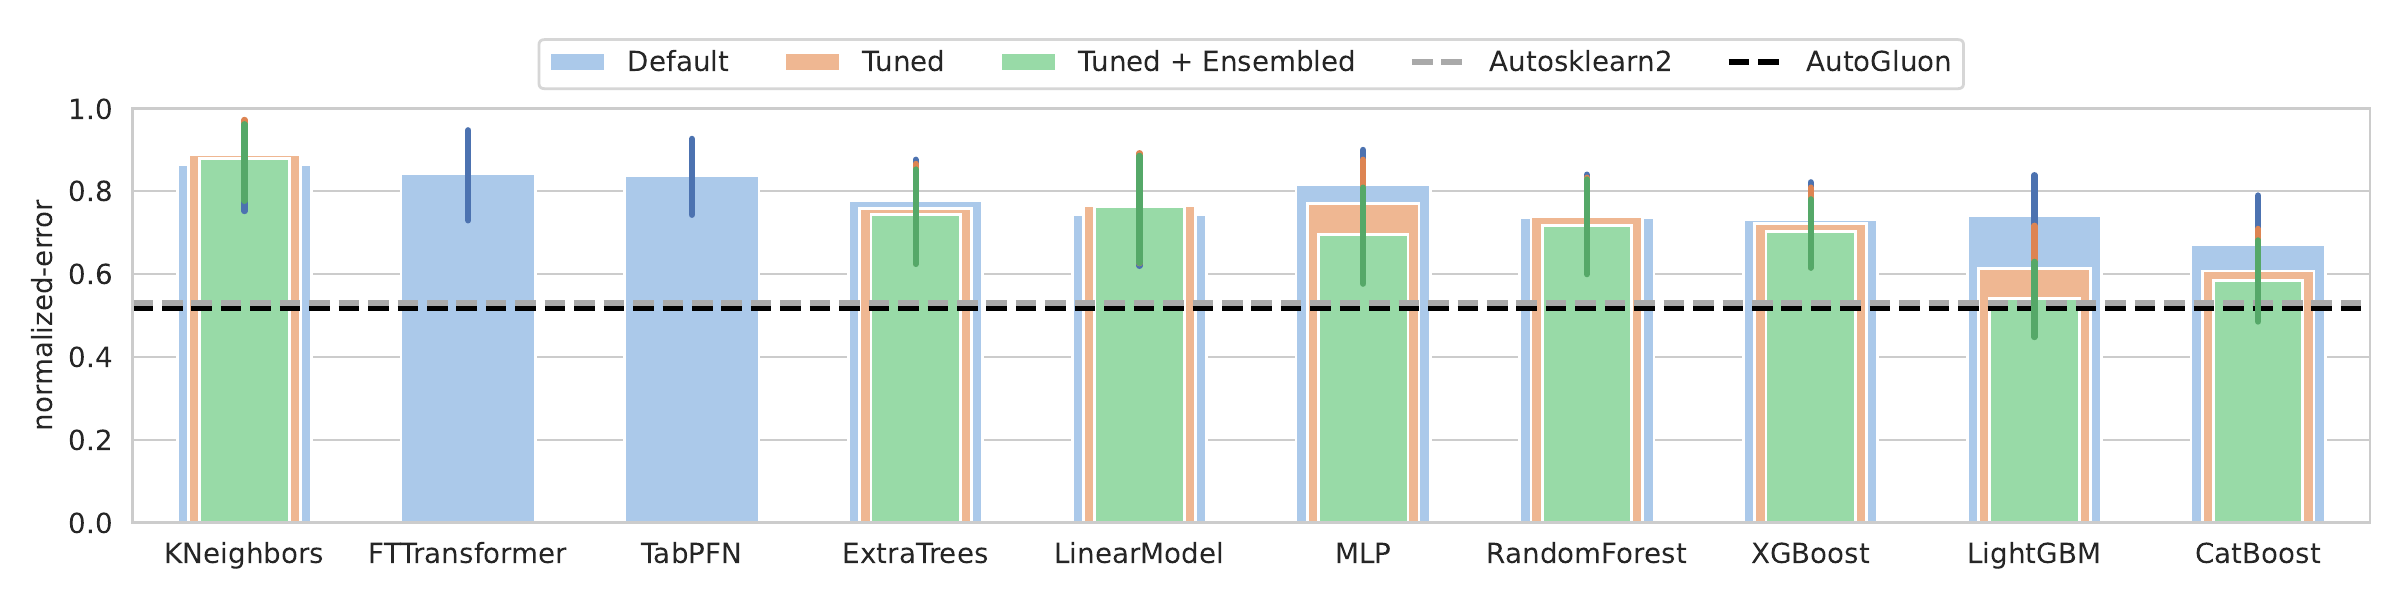

In [12]:
images_list[5]

In [13]:
# Generate Paper Table 2
!python autogluon-benchmark/v1_results/run_eval_tabrepo_v1.py
!python tabrepo/scripts/generate_latex_table_system_comparison.py

Joined with task_metadata (task_metadata.csv), filtered task IDs: 104 -> 104
Filtering to the following problem_type: ['binary', 'multiclass', 'regression']
frameworks = [
	"AutoGluon with Portfolio (Best, 4h8c)",
	"AutoGluon (Best, 4h8c)",
	"XGBoost (2023, 4h8c)",
	"CatBoost (2023, 4h8c)",
	"LightGBM (2023, 4h8c)",
	"autosklearn (2023, 4h8c)",
	"FLAML (2023, 4h8c)",
	"H2OAutoML (2023, 4h8c)",
	"lightautoml (2023, 4h8c)",
	"GAMA (2023, 4h8c)",
	"MLJAR (2023, 4h8c)",
	"TunedRandomForest (2023, 4h8c)",
	"RandomForest (2023, 4h8c)",
]
winrate AutoGluon with Portfolio (Best, 4h8c) vs AutoGluon (Best, 4h8c)
                                        winrate  bestdiff  tierate  wins  folds
jungle_chess_2pcs_raw_endgame_complete      1.0  0.549283      0.0  10.0   10.0
sylvine                                     1.0  0.296363      0.0  10.0   10.0
micro-mass                                  1.0  0.131292      0.0  10.0   10.0
pol                                         1.0  0.117961      0.0  10